# Empalme con la clase anterior

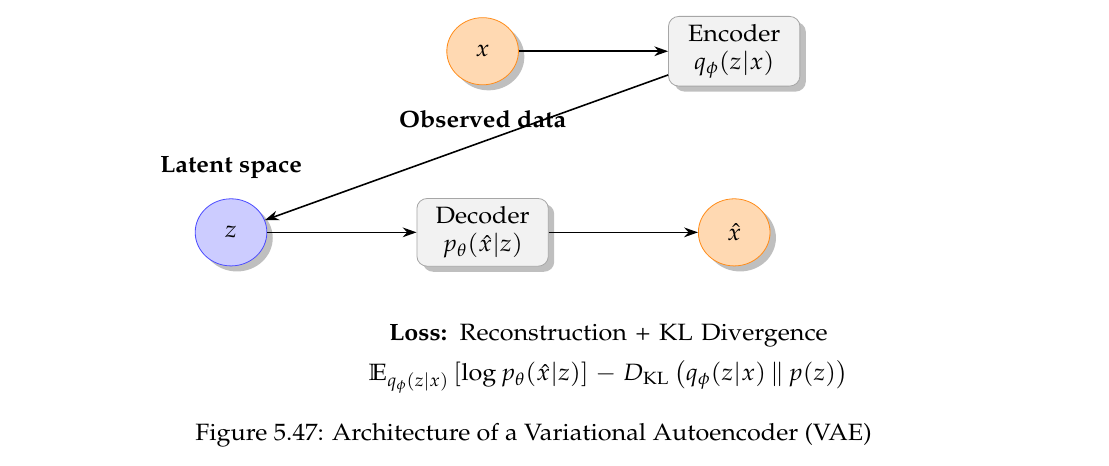

## Busqueda de la funcion de costo para los VAE
Como es un metodo de redes neuronales debemos construir una funcion de costo a la cual le debemos calcular el gradiente y hacer descenso con gradiente, como lo hemos hecho todo el tiempo.

La funcion de costo se basa en las siguientes dos partes.

1. Debemos reconstruir la salida tan cerca como sea posible a la entrada.
2. Existe una metrica llamada
[Kullback-Leibler (KL)](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence)
que mide "la distancia" entre dos densidades de probabilidad.

Queremos ver problema como un problema de optimizacion, donde debemos encontrar una funcion de costo $J(\theta)$.  Asumimos un conjunto de datos

$$\{ x_1, x_2, \cdots, x_m \} $$
Estos generan una variable **latent** (latente) es $z$. El proceso envuelve 2 pasos

1. Se debe muestrear (sample) la variable latente $z$ de una distribucion de
probabilidad (density distribution) a priori $p(z)$. Usualmente es una distribucion normal standard (Gaussiana).

2. Generamos $x$ (la muestra generada) con una distribucion condicional $p(x | z)$

La meta seria maximizar la probabilidad marginal de los datos $X$, es decir $p(X)$. Esta analiticamente se escribe como

$$p_{\theta}(x) = \int p_{\theta}(x, z) dz \tag{1} $$.
Esto es lo que queremos maximizar. Esta expresion es "intractable". Casi imposible de calcular. Por que?

* El espacio latente, donde vive $z$ es en general de altas dimensiones.
* En general la integral no es analittica, no-lineal y muy complicada.
Pero la Ecuacion (1) es el punto de partida para llegar a la funcion de costo.

Transformamos la Ecuacion (1) mediante  el logaritmo de la siguiente forma.

$$\log p_{\theta}(x) = \log \int p_{\theta}(x,z) dz  = \log \int \frac{p_\theta(x,z)}{q_\phi(z | x)}  q_\phi (z | x ) dz $$

Existe una desigualdad llamada la
[desigualdad de Jensen](https://en.wikipedia.org/wiki/Jensen%27s_inequality)
la dice que: Si $f$ es una funcion **convexa** entonces

$$f(\mathbb{E}[X]) \le \mathbb{E}[ f(X)]. $$

En nuestro caso, $\log$ es concava, pero entonces $-\log$ es convexa

$$-\log \mathbb{E}_{q_\phi(z | x)} \left [ \frac{p_{\theta}(x,z)}{q_\phi(z | x)}  \right ]  \le - \mathbb{E}_{q_\phi(z | x)} \log
\left [ \frac{p_{\theta}(x, z)}{q_\phi(z | x)}  \right ] $$
Podemos multiplicar por $-1$

$$ \log p_{\theta}(x) = \log \mathbb{E}_{q_\phi(z | x)} \left [ \frac{p_{\theta}(x,z)}{q_\phi(z | x)}  \right ]  \ge  \mathbb{E}_{q_\phi(z | x)} \log
\left [ \frac{p_{\theta}(x, z)}{q_\phi(z | x)}  \right ] \tag{2} $$

Esta expresion es muy importante en el medio estadistico. Se llama ELBO: **Evidence of Lower Bound**.


 [ELBO](https://en.wikipedia.org/wiki/Evidence_lower_bound).

En este momento ya podemos pensar en un problema de optimizacion.
La expresion de la izquierda de (2) es lo que queremos obtener, pero es muy dificil. La de derecha esta siempre por debajo, entonces la idea es **maximizar** la expresion de la derecha. Pero maximizar la expresion de la derecha es lo mismo que **minimizar** su negativo.  Es decir queremos
minimizar la siguiente funcion de costo

$$C(\theta, \phi, x) =  \mathbb{E}_{q_\phi(z | x)} \log
\left [ \frac{q_\phi(z | x)}{p_\theta(x, z)} \right ]  $$

De la propiedad "regla la cadena para probabilidades" tenemos que
$$p_\theta(x, z) = p_\theta(x | z) p(z) . $$

Entonces, applicando las propiedades del logaritmo y esta ultima propiedad de la regla de la cadena para probabilidades encontramos

\begin{eqnarray}
C(\theta, \phi, x) &=& \mathbb{E}_{q_\phi(z | x)} [ \log q_\phi(z | x)] -
\mathbb{E}_{q_\phi(z | x)} [ \log p_\theta(x | z) ] - \mathbb{E}_{q_\phi(z | x)} [ \log p(z)] \\
&=& -
\mathbb{E}_{q_\phi(z | x)} [ \log p_\theta(x | z) ] +
\mathbb{E}_{q_\phi(z | x)} \log \frac{q_\phi(z | x)}{p(z)} \\
&=& \underbrace{-\mathbb{E}_{q_\phi(z | x)} [ \log p_\theta(x | z) ]}_{\text{reconstruccion}} +  \underbrace{D_{KL} (q_\phi(z | x) \parallel  p(z) )}_{\text{ KL divergence}}.
\end{eqnarray}



Explicamos esta expresion.

* El primer termino se encarga de la reconstruccion y el segundo se llama KL-divergence que lo vamos a estudiar en detalla.

* En la entrada esta $q_\phi( z | x)$. La variable $z$ representa el espacio latente y viene con dos parametros importantes que son la varianza y la media $\sigma^2, \mu$.

* $z$ es la variable que representa el espacio latente. $z \sim q_\phi(z |x)$ en el sentido de que $z$ se alimenta de esta probabilidad condicional. El $z$ se muestrea con la siguiente formula

$$z = \mu + \sigma \circ \epsilon $$
donde $\epsilon \in \mathcal{N}(0,I)$.
Por que este sampleo de esta forma? Lo explico en unos minutos.

* El decodificador ayuda a la reconstruccion mediante $p_\theta(x | z)$.  Este es "likelihood" (verosimilitud) de los datos $x$ dada la variable $z$. Que hacemos con esta probabilidad.? como obtenemos $\hat{x}$?  Aca tenemos dos opciones:
    1. Si queremos reconstruccion
$$\hat{x} = \mathbb{E}_{p_\theta(x | z)} [x] $$
    si $p_\theta(x | z)$ es un modelo Gaussiano,
$$p_\theta(x | z) = \mathcal{N}( x; \mu_{\theta}(z), \sigma^2) $$
en ese caso $\hat{x} = \mu_0(z)$.

    2. Si estamos usando VAE para la generacion de nuevas muestras $\hat{x}= p_\theta(x | z)$. Es decir obtenemos la muestra de la funcion de densidad condicional.


* **KL Divergence**: Se escribe
$$D_{KL}( q_\phi(z | x) \parallel p(z))
= \mathbb{E}_{q_\phi(z | x)} \log \frac{q_\phi(z | x)}{p(z)}.  $$
Esta expresion mide "que tan lejos" esta la funcion de densidad $q_\phi(z | x)$ de la funcion de densidad $p(z)$

Se puede probar (se deja como ejercicio) que el $KL$ Divergence
$$D_{KL}(A \parallel B) \ge 0$$ y
$$D_{KL}(A \parallel B) =0 $$ si y solo si
$A = B$.
Pareciera ser una metrica pero no lo es por que
$$D_{KL}(A \parallel B) \ne D_{KL}( B \parallel A) $$
necesariamente. Se puede dejar como tarea buscar un ejemplo donde sean distintas. O sea que el $D_{KL}$ no es simetrica y por tanto no es una metrica en el sentido del analisis funcional (espacios metricos).

* La perdida de reconstruccion

$$-\mathbb{E}_{q_\phi(z | x)}  [ \log p_\theta(x | z)] $$
Esta parte trata de reconstruir $x$ como $\hat{x}$. Se puede reemplazar por un MSE $\| x - \hat{x} \|^2$. Esto tambien se puede probar a partir de la expresion de arriba asumiento que $p_\theta$, $q_\phi$ son distribucines normales y
$q_\phi( z | x ) \sim \mathcal{N}(0, I)$.

Podemos pensar que si se tienen muchos datos $x_i$, podemos calcular la funcion de costo como

$$J(\theta, \phi) = \frac1m \sum_{i=1}^m C(\theta, \phi, x) $$

Ahora bien, se puede probar (un ejercicio al final del capitulo)
que

$$D_{KL}( q_\phi(z | x) \parallel p(z)) =
\frac12 \sum_{j=1}^d \left ( \mu_j^2 + \sigma_j^2 - \log \sigma_j^2 - 1 \right ). $$


Como dije antes,  a la parte de reconstruccion la podemos reemplazar po $\| x - \hat{x} \|^2$

En ese sentido la funcion de costo para un punto $x$ se ve como

$$C(\theta, \phi, x) =\frac12 \sum_{j=1}^d \left (
    \mu_j^2 + \sigma_j^2 - \log \sigma_j^2 - 1
    \right )  + \| x - \hat{x} \|^2. $$


Estamos asumiento la aproximacion

$$\mathbb{E}_q [ \log p_\theta(x \| z ) ] \approx - \| x - \hat{x} \|^2. $$

Podemos hacer una interpretacion del $D_{KL}$ en funcin de la **entropia** (Shannon 1948, referencia en las notas de clase).

El concepto de **information content** (contenido de informacion) es minimo numero de bits que se requieren para representar un objeto. Por ejemplo si se tiene una informacion binaria $0,1$, con un bit se puede representar. O sea que el contenido de informacion de una variable booleana (binaria) es 1.

En general si tiene un numero $N$, el numero de bits para represenar ese numero en base binaria es $\log_2 N$.

Por ejemplo $16 = (1000)_2$ cuatro bits que es el logaritmo de $16$ en base dos. En general, la inforamcion de $N$ esta dada por

$$I = n = \log_2 N. $$

Usamos ahora la probabilidad
$$p(x)=1/N = 1/2^n$$,
Podemos asociar a $x$ con $N$.
En este lenguaje de las probabilidades podemos escribir


$$I(x)= -\log_2 p(x) = -\log_2 \frac{1}{N} = - \log_2 \frac{1}{2^n} = - (-n) = n. $$

En este momento $I(x)$ es el contenido de informacion de la variable $x=N$.

Definimos la entropia $H(x)$ de una variable aleatoria $X$ como la esperanza del contenido de informacion sobre todos los $x_i$.

$$H(x)  = \mathbb{E}( I(x)) = -\sum_{i=1}^n p(x_i) \log p(x_i) $$
aca $\log$ puede tener cualquier base.

En el continuo

$$H(x) = \mathbb{E} ( I(x)) = - \int p(x) \log p(x) dx.  $$

Como se relaciona el Kullback-Leibler divergence $D_{KL}$ con la entropia? (aparece la entropia cruzada "cross-entropy").
(pensemos en el continuo)

$$D_{KL} ( P \parallel Q) = \int p(x) [\log p(x) - \log q(x) ] dx $$

Esto es igual a

$$D_{KL} ( P \parallel Q) = \int p(x) \left [\log \frac{p(x)}{q(x)}  \right ] dx $$

$$D_{KL} ( P \parallel Q) = \int p(x) [\log p(x) - \log q(x) ] dx= \int p(x) \log p(x) dx - \int p(x) \log q(x) dx= H_{pq} - H_p. $$
El termino $H_{pq}$ es entropia relativa o entropia cruzada (cross-entropy).

### Reparameterization trick : Truco de reparametrizacion.
Este "truco" fue introducido por Kingma and Wellin, 2013 (referencia en las notas de clase).
El problema aparece cuando se quiere hacer "backpropagation" que necesitamos el gradiente de la funcion de costo propagada hacia atras en las distintas capas. Cuando llegamos al espacio latente, resula que para VAE, esto es una variable aleatoria y no se puede calcular el gradiente sobre esta variable aleatoria. El gradiente es **deterministico**.  Kingma y Wellin introdujeron el truco

$$z = \mu + \sigma \circ \epsilon $$
donde $\epsilon \in \mathcal{N}(0,I)$.
Lo interesante es que $z$ es $\mathcal{N}(\mu, \sigma^2)$.
La prueba de esto se deja como un ejercicio al final del capitulo. La idea es usar los siguientes teoremas de la estadistica basica

$$\mathbb{E}[x + c] = \mathbb{E}[x] + c $$
$$\mathbb{E} [a x] = a \mathbb{E}[x] $$
$$\mathbb{V} [a x] = a^2 \mathbb{E}[x] $$

La Siguiente grafica ilustra el truco de reparametrizacion.

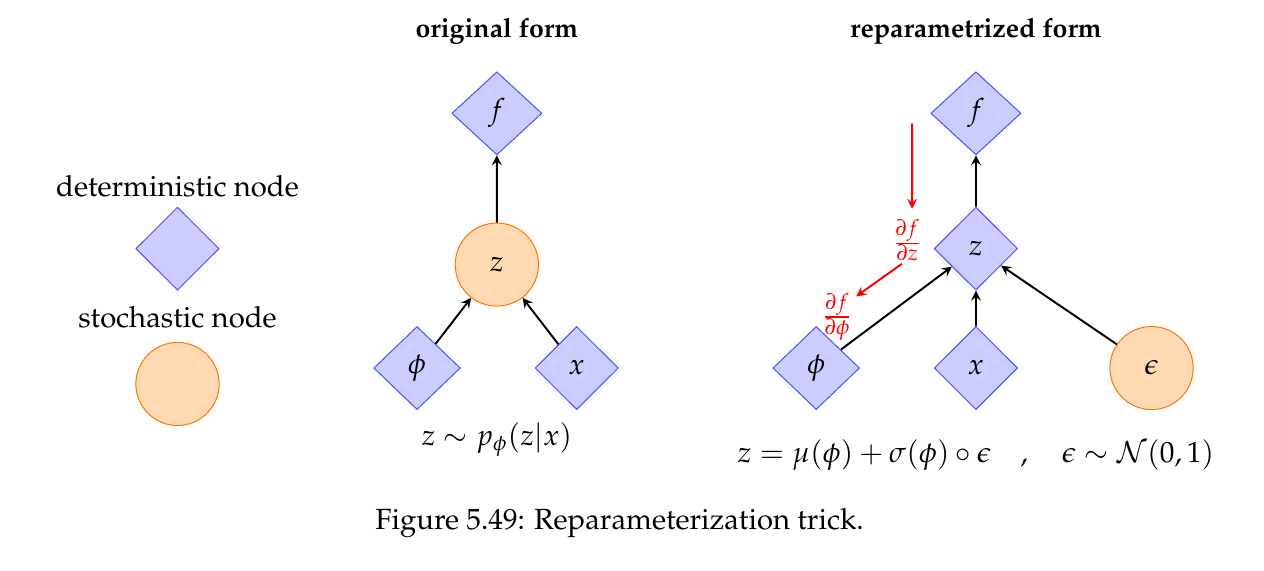

El siguiente diagrama ilustra el flujo del VAE.

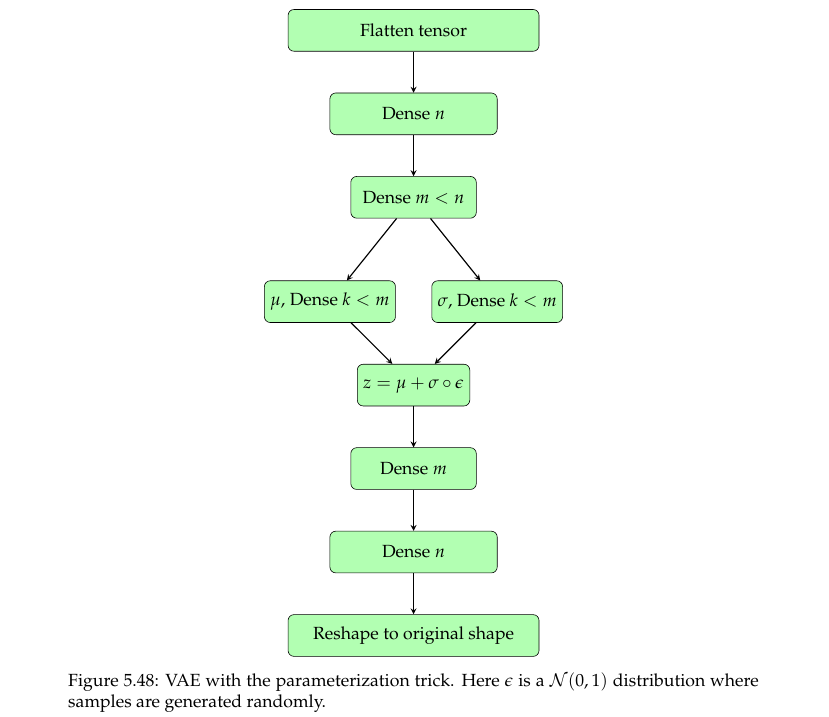

La arquitectura de la Figura 5.48 es MLP, pero tambien podria ser CNN.

La siguiente tabla hace un "mapping" de los simbolos (parametros $\phi, \theta$ con los otros elementos que tiene la red.



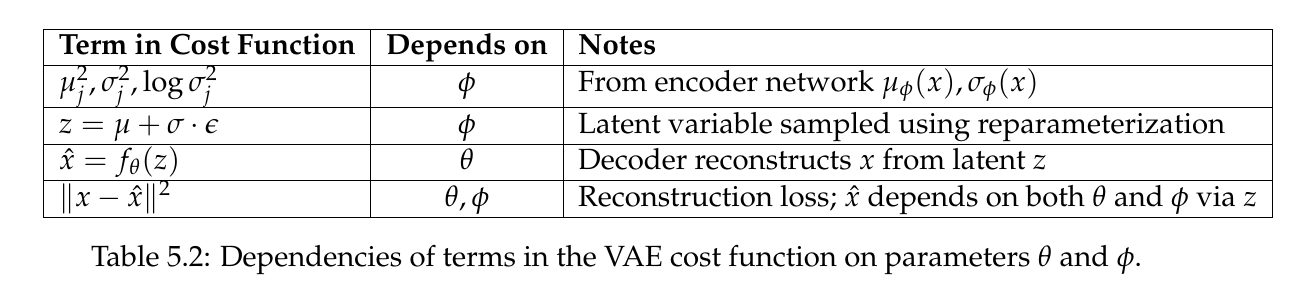

En vez de $\sigma$ se usa, en el codigo

$$\frac12 \log \sigma^2 $$
pues, es facil ver que

$$\sigma = \exp \left ( \frac12 \log ( \sigma^2)  \right )  $$
Es preferible el sigma asi por que tiene signo, es positivo y negativo. Recuerde $z = \mu + \sigma \circ \epsilon$

La siguiente grafica corresponde a la proyeccion del MNIST a 2 dimensiones. Esta grafica seria la correspondiente a la de AutoEncoders de la clase anterior.

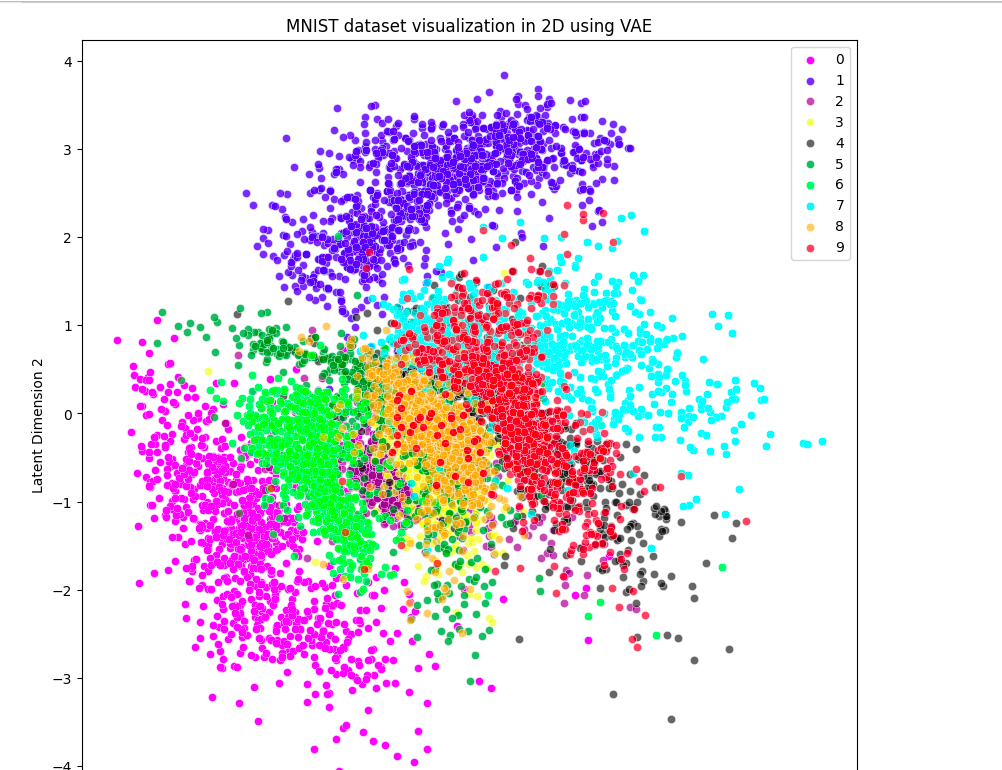

La Figura anterior fue generada por un codigo hecho en clase pero en mi aplicatio de Jupyter-lab. El programa como esta no corre en GoogleColab.

La Figura siguiene, tambien fue hecho en mi aplicacion de Jupyter-lab, pues no corre en este ambiente. En general, genera buenos digitos, con algunos pocos "blurry" (borrosos y mal enfocados) probablemente estas muestras se tomaron de zonas blancas.

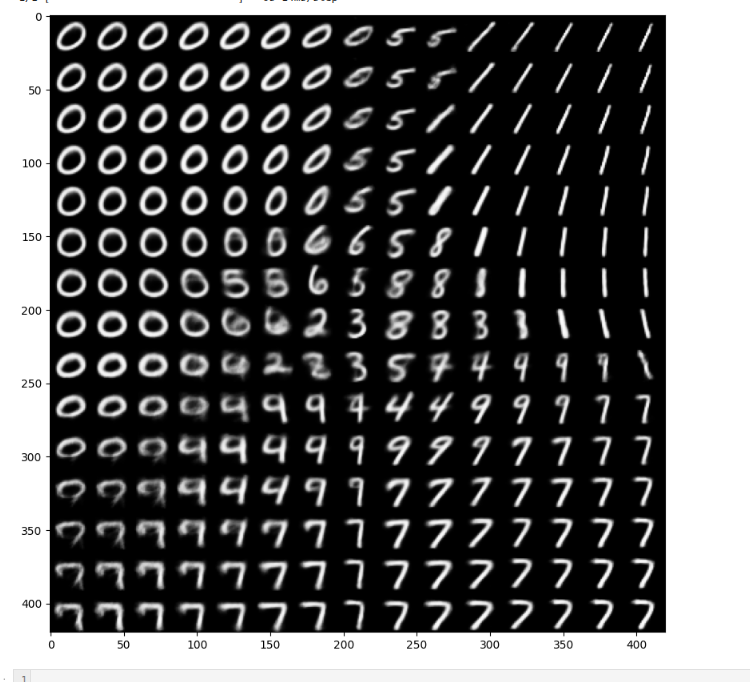

Existe otra tecnica de VAE llamada
**Vector Quantized Variational Autoencoders** (VA-VAE).
[De Hugging Face](https://huggingface.co/blog/ariG23498/understand-vq).

Esto esta por fuera del curso. Incluso no hay material en las notas de clase. Mas adelante lo completo.
. The original reference for this is by van den Oord, A., Vinyals, O.,
& Kavukcuoglu, K. (2017),
La referencia esta en las notas de clase.

# Stable Difussion Models.
Estos modelos tiene practicamente la misma matematica de los VAE, pero tambien estan por fuera del alcance de esta clase.